# EE 610 Image Processing Assignment 2

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

**Q1) Take a night time photo with your phone camera (if your phone camera is already very good, then borrow
someone else's phone) and try to enhance it by manipulating its histogram and reducing noise. It should still
look natural and like a night time photo, but more details should be apparent than before**

Text(0.5, 1.0, 'original image')

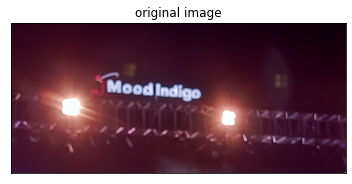

In [3]:
img1 = cv.imread('nightshot.jpg')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
(r1,g1,b1)=cv.split(img1)
plt.imshow(img1),plt.xticks([]),plt.yticks([])
plt.title('original image')

The image is a nightshow taken by me. The objective of processing is to remove any scanlines(if present), reduce noise and enhance the image details like the word 'Mood indigo'

In [4]:
img1.shape

(1800, 4000, 3)

**red channel**

Text(0.5, 1.0, 'laplacian of red channel')

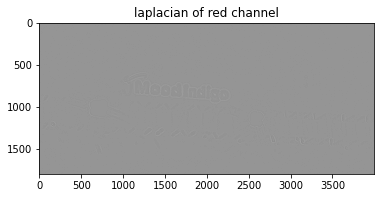

In [5]:
laplace_r1 = cv.Laplacian(r1,cv.CV_64F) #Applying laplacian filter to get edges
plt.imshow(laplace_r1,cmap='gray')
plt.title('laplacian of red channel')

In [6]:
rows,cols = r1.shape
padding = np.zeros((2*rows,2*cols))
padding[:rows,:cols] = r1
r1 = padding #padding to prevent aliasing

dftr1 = cv.dft(np.float32(r1),flags=cv.DFT_COMPLEX_OUTPUT) #taking dft
dftr1_shift = np.fft.fftshift(dftr1) #shifting center from topleft corner to the middle
mag_specr1 = 20*np.log(cv.magnitude(dftr1_shift[:,:,0],dftr1_shift[:,:,1]))

plt.figure(figsize=(8,4))
plt.subplot(121),
plt.imshow(r1,cmap='gray')
plt.title('red channel with padding'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(mag_specr1,cmap='gray')
plt.title('DFT magnitude spectrum'),plt.xticks([]),plt.yticks([])
#the dft and idft in all the questions is taken from the opencv fourier transform official documentation

(Text(0.5, 1.0, 'DFT magnitude spectrum'), ([], []), ([], []))

In the DFT magnitude spectrum we can clearly see prominent vertical and horizontal line, let's remove them using a notch filter 

Text(0.5, 1.0, 'DFT magnitude spectrum with mask')

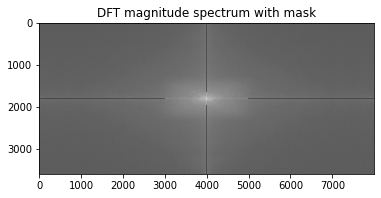

In [7]:
mask = np.ones(mag_specr1.shape) #mask to remove the freq conponents of scan lines
mask[:1650,3990:4000]=0
mask[1950:,3990:4000]=0
mask[1795:1805,:3000]=0
mask[1795:1805,5000:]=0
plt.imshow((mag_specr1)*mask,cmap='gray')
plt.title('DFT magnitude spectrum with mask')

C:\Users\hp\AppData\Local\Temp\ipykernel_1628\87118301.py:10: RuntimeWarning: divide by zero encountered in log
  mag_ispecr1 = 20*np.log(cv.magnitude(fshiftr1[:,:,0],fshiftr1[:,:,1]))


(Text(0.5, 1.0, 'DFT red channel'), ([], []), ([], []))

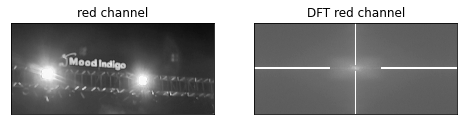

In [8]:
mask2=np.zeros((2*rows,2*cols,2))
mask2[:,:,0]=mask
mask2[:,:,1]=mask

fshiftr1 = dftr1_shift*mask2
f_ishiftr1 = np.fft.ifftshift(fshiftr1)
imgr1_back = cv.idft(f_ishiftr1)
imgr1_back = cv.magnitude(imgr1_back[:,:,0],imgr1_back[:,:,1])
imgr1_back = imgr1_back[:rows,:cols]
mag_ispecr1 = 20*np.log(cv.magnitude(fshiftr1[:,:,0],fshiftr1[:,:,1]))

plt.figure(figsize=(8,4))
plt.subplot(121),
plt.imshow(imgr1_back,cmap='gray')
plt.title('red channel'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(mag_ispecr1,cmap='gray')
plt.title('DFT red channel'),plt.xticks([]),plt.yticks([])

Text(0.5, 1.0, 'red channel + its laplacian')

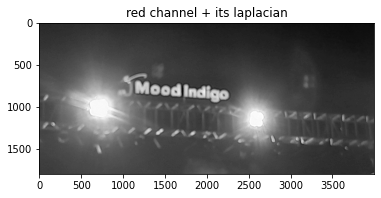

In [9]:
imgr1_back+=laplace_r1
plt.imshow(imgr1_back,cmap='gray')
plt.title('red channel + its laplacian')

In [10]:
imgr1_back = imgr1_back**1.3
maxr = imgr1_back.max()
imgr1_back/=maxr
imgr1_back*=255
imgr1_back=imgr1_back.astype(np.uint8)

**green channel**

Text(0.5, 1.0, 'laplacian of green channel')

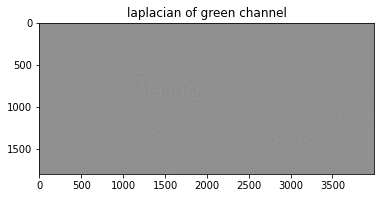

In [11]:
laplace_g1 = cv.Laplacian(g1,cv.CV_64F)
plt.imshow(laplace_g1,cmap='gray')
plt.title('laplacian of green channel')

(Text(0.5, 1.0, 'DFT magnitude spectrum'), ([], []), ([], []))

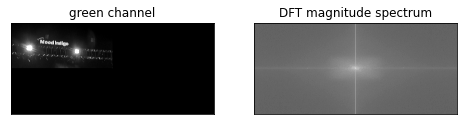

In [12]:
rows,cols = g1.shape
padding = np.zeros((2*rows,2*cols))
padding[:rows,:cols] = g1
g1 = padding

dftg1 = cv.dft(np.float32(g1),flags=cv.DFT_COMPLEX_OUTPUT)
dftg1_shift = np.fft.fftshift(dftg1)
mag_specg1 = 20*np.log(cv.magnitude(dftg1_shift[:,:,0],dftg1_shift[:,:,1]))

plt.figure(figsize=(8,4))
plt.subplot(121),
plt.imshow(g1,cmap='gray')
plt.title('green channel'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(mag_specg1,cmap='gray')
plt.title('DFT magnitude spectrum'),plt.xticks([]),plt.yticks([])

In [13]:
mask = np.ones(mag_specg1.shape)
mask[:1650,3990:4000]=0
mask[1950:,3990:4000]=0
mask[1795:1805,:3000]=0
mask[1795:1805,5000:]=0
plt.imshow((mag_specg1)*mask,cmap='gray')
plt.title('DFT magnitude spectrum with mask')

Text(0.5, 1.0, 'DFT magnitude spectrum with mask')

C:\Users\hp\AppData\Local\Temp\ipykernel_1628\1423123112.py:10: RuntimeWarning: divide by zero encountered in log
  mag_ispecg1 = 20*np.log(cv.magnitude(fshiftg1[:,:,0],fshiftg1[:,:,1]))


(Text(0.5, 1.0, 'DFT magnitude spectrum'), ([], []), ([], []))

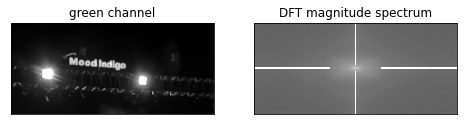

In [14]:
mask2=np.zeros((2*rows,2*cols,2))
mask2[:,:,0]=mask
mask2[:,:,1]=mask

fshiftg1 = dftg1_shift*mask2
f_ishiftg1 = np.fft.ifftshift(fshiftg1)
imgg1_back = cv.idft(f_ishiftg1)
imgg1_back = cv.magnitude(imgg1_back[:,:,0],imgg1_back[:,:,1])
imgg1_back = imgg1_back[:rows,:cols]
mag_ispecg1 = 20*np.log(cv.magnitude(fshiftg1[:,:,0],fshiftg1[:,:,1]))

plt.figure(figsize=(8,4))
plt.subplot(121),
plt.imshow(imgg1_back**1.2,cmap='gray')
plt.title('green channel'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(mag_ispecg1,cmap='gray')
plt.title('DFT magnitude spectrum'),plt.xticks([]),plt.yticks([])

Text(0.5, 1.0, 'green channel + its laplacian')

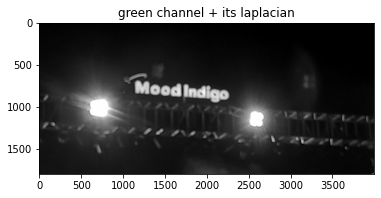

In [15]:
imgg1_back+=laplace_g1
plt.imshow(imgg1_back,cmap='gray')
plt.title('green channel + its laplacian')

In [16]:
imgg1_back = imgg1_back**1.3

maxg = imgg1_back.max()
imgg1_back/=maxg
imgg1_back*=255
imgg1_back=imgg1_back.astype(np.uint8)

**blue channel**

Text(0.5, 1.0, 'laplacian of green channel')

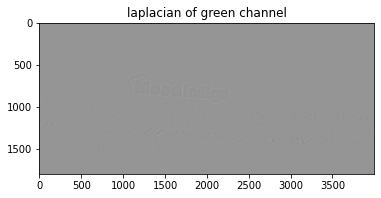

In [17]:
laplace_b1 = cv.Laplacian(b1,cv.CV_64F)
plt.imshow(laplace_b1,cmap='gray')
plt.title('laplacian of green channel')

(Text(0.5, 1.0, 'DFT magnitude spectrum'), ([], []), ([], []))

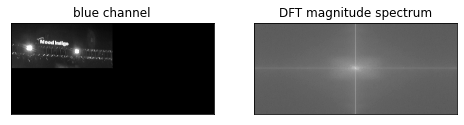

In [18]:
rows,cols = b1.shape
padding = np.zeros((2*rows,2*cols))
padding[:rows,:cols] = b1
b1 = padding

dftb1 = cv.dft(np.float32(b1),flags=cv.DFT_COMPLEX_OUTPUT)
dftb1_shift = np.fft.fftshift(dftb1)
mag_specb1 = 20*np.log(cv.magnitude(dftb1_shift[:,:,0],dftb1_shift[:,:,1]))

plt.figure(figsize=(8,4))
plt.subplot(121),
plt.imshow(b1,cmap='gray')
plt.title('blue channel'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(mag_specb1,cmap='gray')
plt.title('DFT magnitude spectrum'),plt.xticks([]),plt.yticks([])

Text(0.5, 1.0, 'DFT magnitude spectrum with mask')

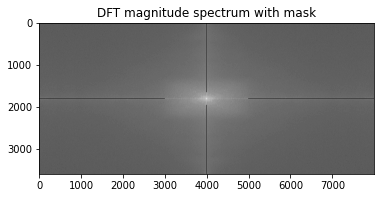

In [19]:
mask = np.ones(mag_specb1.shape)
mask[:1650,3990:4000]=0
mask[1950:,3990:4000]=0
mask[1795:1805,:3000]=0
mask[1795:1805,5000:]=0
plt.imshow((mag_specb1)*mask,cmap='gray')
plt.title('DFT magnitude spectrum with mask')

C:\Users\hp\AppData\Local\Temp\ipykernel_1628\1798795063.py:10: RuntimeWarning: divide by zero encountered in log
  mag_ispecb1 = 20*np.log(cv.magnitude(fshiftb1[:,:,0],fshiftb1[:,:,1]))


(Text(0.5, 1.0, 'DFT magnitude spectrum'), ([], []), ([], []))

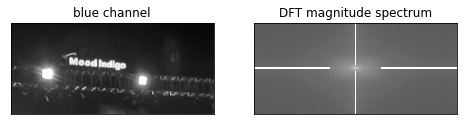

In [20]:
mask2=np.zeros((2*rows,2*cols,2))
mask2[:,:,0]=mask
mask2[:,:,1]=mask

fshiftb1 = dftb1_shift*mask2
f_ishiftb1 = np.fft.ifftshift(fshiftb1)
imgb1_back = cv.idft(f_ishiftb1)
imgb1_back = cv.magnitude(imgb1_back[:,:,0],imgb1_back[:,:,1])
imgb1_back = imgb1_back[:rows,:cols]
mag_ispecb1 = 20*np.log(cv.magnitude(fshiftb1[:,:,0],fshiftb1[:,:,1]))

plt.figure(figsize=(8,4))
plt.subplot(121),
plt.imshow(imgb1_back,cmap='gray')
plt.title('blue channel'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(mag_ispecb1,cmap='gray')
plt.title('DFT magnitude spectrum'),plt.xticks([]),plt.yticks([])

In [21]:
imgb1_back+=laplace_b1
plt.imshow(imgb1_back,cmap='gray')
plt.title('green channel + its laplacian')

Text(0.5, 1.0, 'green channel + its laplacian')

In [22]:
imgb1_back = imgb1_back**1.3

maxb = imgb1_back.max()
imgb1_back/=maxb
imgb1_back*=255
imgb1_back=imgb1_back.astype(np.uint8)

In [23]:
imgg1_back.shape

(1800, 4000)

In [25]:
img1_final=cv.merge([(imgr1_back**1).astype(np.uint8),(imgg1_back**1).astype(np.uint8),(imgb1_back**1).astype(np.uint8)])
plt.imshow(img1_final)
img1_final=cv.cvtColor(img1_final,cv.COLOR_BGR2RGB)
cv.imwrite('img1_final.png',img1_final)

True

After applying notch filters and adding with laplacians, the image looks better. The edges of word 'Mood Indigo' are sharper than in the original image, also the original image had red color smeared all across the image which has been reduced now

**Q2) Remove the newspaper-ink-dot effect and try to make the image more natural-looking**

In [297]:
img2 = cv.imread('newspaper-dots.jpg',0)
plt.imshow(img2,cmap='gray')

In the given image we can see clear moire pattern. Let's remove the moire effect by frequency domain filtering

(Text(0.5, 1.0, 'DFT magnitude spectrum'), ([], []), ([], []))

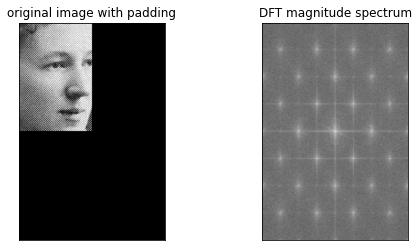

In [298]:
rows,cols = img2.shape
padding = np.zeros((2*rows,2*cols))
padding[:rows,:cols]=img2
img2 = padding #padding

dft2 = cv.dft(np.float32(img2),flags=cv.DFT_COMPLEX_OUTPUT) #taking dft
dft2_shift = np.fft.fftshift(dft2) #shifting center from top left corner to center
mag_spec2 = 20*np.log(cv.magnitude(dft2_shift[:,:,0],dft2_shift[:,:,1]))

plt.figure(figsize=(8,4))
plt.subplot(121),plt.imshow(img2,cmap='gray')
plt.title('original image with padding'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(mag_spec2,cmap='gray')
plt.title('DFT magnitude spectrum'),plt.xticks([]),plt.yticks([])

We pad the original image with zeros along both dimensions to prevent aliasing
We can clearly see in the DFT magnitude spectrum conjugate components at (x,y) & (-x,-y) w.r.t shifted center, which are frequency components of periodic moire pattern

In [299]:
moire = np.where(mag_spec2>225,0,255) #np.where() replaces pixels in mag_spec2 with values greater than 225 by 0 and otherwise by 255
plt.figure(figsize=(8,4))
plt.imshow(moire,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('mask obtained')

Text(0.5, 1.0, 'mask obtained')

Text(0.5, 1.0, 'mask after drawing circle')

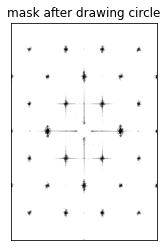

In [300]:
cv.circle(moire,(320,476),30,255,-1) #cv.circle() draws a circle with given center and given radius
plt.figure(figsize=(8,4))
plt.imshow(moire,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('mask after drawing circle')

We have to unmask the region around the center as it contains imformation about the man's face in img2
In this image there is a sudden transition from the unmasked circle amd masked region along the axes. Such sudden transitions lead to ringing effect

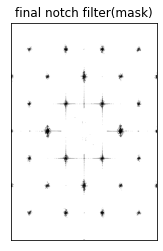

In [301]:
remove1 = np.ones((200,11))*255
remove2 = np.ones((9,200))*255
moire[377:577,315:326]=remove1
moire[473:482,220:420]=remove2
plt.figure(figsize=(8,4))
plt.imshow(moire,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('final notch filter(mask)')

rows,cols = moire.shape
mask = np.zeros((rows,cols,2))
mask[:,:,0]=moire
mask[:,:,1]=moire

C:\Users\hp\AppData\Local\Temp\ipykernel_1628\88099266.py:8: RuntimeWarning: divide by zero encountered in log
  mag_ispec2 = 20*np.log(cv.magnitude(fshift[:,:,0],fshift[:,:,1]))


Text(0.5, 1.0, 'DFT magnitude spectrum after notch filtering')

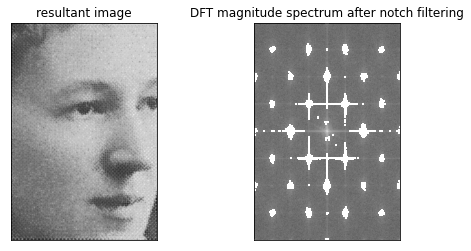

In [303]:
padded = dft2_shift*mask
fshift = padded[:rows,:cols,:]
f_ishift = np.fft.ifftshift(fshift) #shifting center back to top left corner
img_back = cv.idft(f_ishift) #taking idft
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
img = img_back[:477,:320]**0.7 #gamma transformation
img = cv.GaussianBlur(np.float32(img),(3,3),0) #Guassian blur filter
mag_ispec2 = 20*np.log(cv.magnitude(fshift[:,:,0],fshift[:,:,1]))

plt.figure(figsize=(8,4))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('resultant image')
plt.subplot(122),plt.imshow(mag_ispec2,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude spectrum after notch filtering')

After notch filtering I have used gamma transformation with gamma = 0.7 to enhance the image and GuassianBlur to smoothen the image

In [62]:
cv.imwrite('two.png',img)

True

**Q3) Triton is the largest of Neptune's satellites (moons), and is the most unusual in our solar system as it orbits
its planet in the opposite direction to the planet's rotation.The given picture seems to have some subtle horizontal (and possibly vertical) scan lines. Enhance this image by removing the scanning artifacts. Also try to reveal more details by manipulating the histogram. You can choose to work on a sub-image or a gray scale version, but for full marks maintain the color balance (ratio of R:G:B at each pixel)**

(<matplotlib.image.AxesImage at 0x16be43beaf0>, ([], []), ([], []))

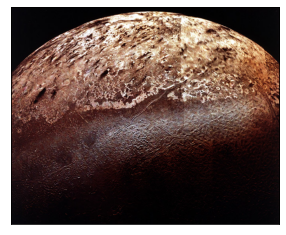

In [265]:
img3 = cv.imread('triton_voyager2.jpg')
img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
(r3, g3, b3) = cv.split(img3) #splitting RGB image into 3 differnt channels
plt.imshow(img3),plt.xticks([]),plt.yticks([])

The given image is a RGB image. Let's work on each channel individually

In [266]:
img3.shape

(551, 680, 3)

 **Blue channel**

Text(0.5, 1.0, 'DFT magnitude response')

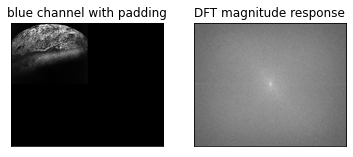

In [267]:
rows,cols = b3.shape
padding = np.zeros((2*rows,2*cols))
padding[:rows,:cols]=b3
b3 = padding

dftb3 = cv.dft(np.float32(b3),flags=cv.DFT_COMPLEX_OUTPUT)
dftb3_shift = np.fft.fftshift(dftb3)
mag_specb3 = 20*np.log(cv.magnitude(dftb3_shift[:,:,0],dftb3_shift[:,:,1]))

plt.subplot(121), plt.imshow(b3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('blue channel with padding')
plt.subplot(122),plt.imshow(mag_specb3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude response')

(<matplotlib.image.AxesImage at 0x16be47ec160>, ([], []), ([], []))

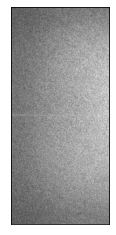

In [268]:
x = mag_specb3[:,:500]
plt.imshow(x**2,cmap='gray'),plt.xticks([]),plt.yticks([])

Seeing a small portion of the mag response, this clearly shows presence of scanlines

Text(0.5, 1.0, 'freq magnitude after applying mask')

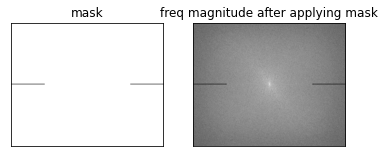

In [269]:
mask=np.ones((2*rows,2*cols))
mask[549:554,:300]=0
mask[549:554,1060:]=0
mag_specb3*=mask
plt.subplot(121), plt.imshow(mask,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('mask')
plt.subplot(122),plt.imshow(mag_specb3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('freq magnitude after applying mask')

C:\Users\hp\AppData\Local\Temp\ipykernel_7936\724766395.py:10: RuntimeWarning: divide by zero encountered in log
  mag_ispecb3 = np.log(cv.magnitude(fshift_b3[:,:,0],fshift_b3[:,:,1]))


Text(0.5, 1.0, 'freq response')

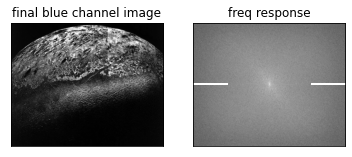

In [270]:
mask2 = np.zeros((2*rows,2*cols,2))
mask2[:,:,0]=mask
mask2[:,:,1]=mask

fshift_b3 = dftb3_shift*mask2
fb3_ishift = np.fft.ifftshift(fshift_b3)
imgb3_back = cv.idft(fb3_ishift)
imgb3_back = cv.magnitude(imgb3_back[:,:,0],imgb3_back[:,:,1])
imgb3 = imgb3_back[:551,:680]
mag_ispecb3 = np.log(cv.magnitude(fshift_b3[:,:,0],fshift_b3[:,:,1]))

plt.subplot(121),plt.imshow(imgb3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('final blue channel image')
plt.subplot(122),plt.imshow(mag_ispecb3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('freq response')

In [271]:
#scaling the array to 0-255 range and changing dtype to uint8
maxb = imgb3.max()
imgb3/=maxb
imgb3*=255
imgb3=imgb3.astype(np.uint8)

**green channel**

Text(0.5, 1.0, 'freq magnitude response')

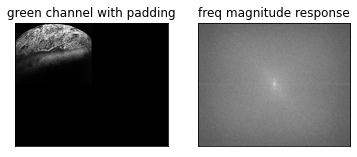

In [272]:
rows,cols = g3.shape
padding = np.zeros((2*rows,2*cols))
padding[:rows,:cols]=g3
g3 = padding

dftg3 = cv.dft(np.float32(g3),flags=cv.DFT_COMPLEX_OUTPUT)
dftg3_shift = np.fft.fftshift(dftg3)
mag_specg3 = 20*np.log(cv.magnitude(dftg3_shift[:,:,0],dftg3_shift[:,:,1]))

plt.subplot(121), plt.imshow(g3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('green channel with padding')
plt.subplot(122),plt.imshow(mag_specg3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('freq magnitude response')

(<matplotlib.image.AxesImage at 0x169ec3a8280>, ([], []), ([], []))

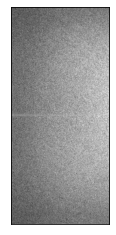

In [273]:
x = mag_specg3[:,:500]
plt.imshow(x**2,cmap='gray'),plt.xticks([]),plt.yticks([])

Seeing a small portion of the mag response, this clearly shows presence of scanlines

Text(0.5, 1.0, 'DFT magnitude after applying mask')

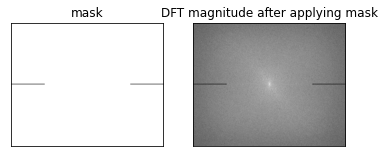

In [274]:
mask=np.ones((2*rows,2*cols))
mask[549:554,:300]=0
mask[549:554,1060:]=0
mag_specg3*=mask
plt.subplot(121), plt.imshow(mask,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('mask')
plt.subplot(122),plt.imshow(mag_specg3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude after applying mask')

C:\Users\hp\AppData\Local\Temp\ipykernel_7936\1528779328.py:10: RuntimeWarning: divide by zero encountered in log
  mag_ispecg3 = np.log(cv.magnitude(fshift_g3[:,:,0],fshift_g3[:,:,1]))


Text(0.5, 1.0, 'DFT magnitude response')

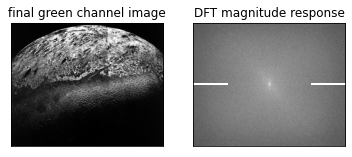

In [275]:
mask2 = np.zeros((2*rows,2*cols,2))
mask2[:,:,0]=mask
mask2[:,:,1]=mask

fshift_g3 = dftg3_shift*mask2
fg3_ishift = np.fft.ifftshift(fshift_g3)
imgg3_back = cv.idft(fg3_ishift)
imgg3_back = cv.magnitude(imgg3_back[:,:,0],imgg3_back[:,:,1])
imgg3 = imgg3_back[:551,:680]
mag_ispecg3 = np.log(cv.magnitude(fshift_g3[:,:,0],fshift_g3[:,:,1]))

plt.subplot(121),plt.imshow(imgg3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('final green channel image')
plt.subplot(122),plt.imshow(mag_ispecg3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude response')

In [276]:
#scaling the array to 0-255 range and changing dtype to uint8
maxg = imgg3.max()
imgg3/=maxg
imgg3*=255
imgg3=imgg3.astype(np.uint8)

**red channel**

Text(0.5, 1.0, 'DFT magnitude response')

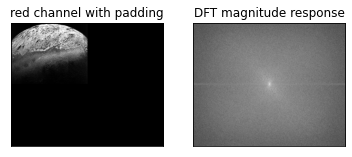

In [277]:
rows,cols = r3.shape
padding = np.zeros((2*rows,2*cols))
padding[:rows,:cols]=r3
r3 = padding

dftr3 = cv.dft(np.float32(r3),flags=cv.DFT_COMPLEX_OUTPUT)
dftr3_shift = np.fft.fftshift(dftr3)
mag_specr3 = 20*np.log(cv.magnitude(dftr3_shift[:,:,0],dftr3_shift[:,:,1]))

plt.subplot(121), plt.imshow(r3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('red channel with padding')
plt.subplot(122),plt.imshow(mag_specr3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude response')

(<matplotlib.image.AxesImage at 0x16b13637670>, ([], []), ([], []))

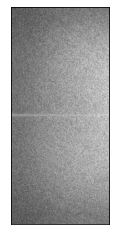

In [278]:
x = mag_specr3[:,:500]
plt.imshow(x**2,cmap='gray'),plt.xticks([]),plt.yticks([])

Seeing a small portion of the mag response, this clearly shows presence of scanlines

Text(0.5, 1.0, 'DFT magnitude after applying mask')

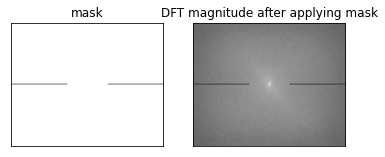

In [279]:
mask=np.ones((2*rows,2*cols))
mask[549:554,:500]=0
mask[549:554,860:]=0
mag_specr3*=mask
plt.subplot(121), plt.imshow(mask,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('mask')
plt.subplot(122),plt.imshow(mag_specr3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude after applying mask')

C:\Users\hp\AppData\Local\Temp\ipykernel_7936\2742853586.py:10: RuntimeWarning: divide by zero encountered in log
  mag_ispecr3 = np.log(cv.magnitude(fshift_r3[:,:,0],fshift_r3[:,:,1]))


Text(0.5, 1.0, 'DFT magnitude response')

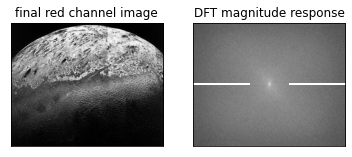

In [280]:
mask2 = np.zeros((2*rows,2*cols,2))
mask2[:,:,0]=mask
mask2[:,:,1]=mask

fshift_r3 = dftr3_shift*mask2
fr3_ishift = np.fft.ifftshift(fshift_r3)
imgr3_back = cv.idft(fr3_ishift)
imgr3_back = cv.magnitude(imgr3_back[:,:,0],imgr3_back[:,:,1])
imgr3 = imgr3_back[:551,:680]
mag_ispecr3 = np.log(cv.magnitude(fshift_r3[:,:,0],fshift_r3[:,:,1]))

plt.subplot(121),plt.imshow(imgr3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('final red channel image')
plt.subplot(122),plt.imshow(mag_ispecr3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude response')

In [281]:
#scaling the array to 0-255 range and changing dtype to uint8
maxr = imgr3.max()
imgr3/=maxr
imgr3*=255
imgr3=imgr3.astype(np.uint8)

True

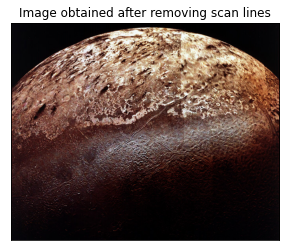

In [282]:
img3_scanlines = cv.merge([imgr3,imgg3,imgb3])
plt.imshow(img3_scanlines),plt.xticks([]),plt.yticks([])
plt.title('Image obtained after removing scan lines')
b=cv.cvtColor(img3_scanlines,cv.COLOR_BGR2RGB)
cv.imwrite('b.jpg',b)

The image img3_scanlines obtained by frequency domain filtering has significantly less scanlines than the original image

**modifying histogram**

Let's try histogram equalization if it can reveal more details

Text(0.5, 1.0, 'blue channel equalized')

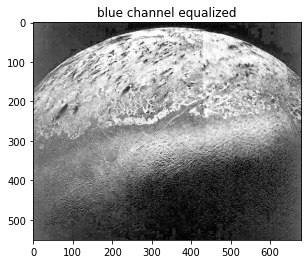

In [289]:
equalize_imgb3 = cv.equalizeHist(imgb3)
plt.imshow(equalize_imgb3,cmap='gray')
plt.title('blue channel equalized')

Text(0.5, 1.0, 'green channel equalized')

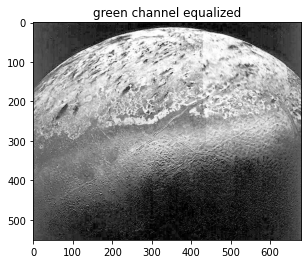

In [288]:
equalize_imgg3 = cv.equalizeHist(imgg3)
plt.imshow(equalize_imgg3,cmap='gray')
plt.title('green channel equalized')

Text(0.5, 1.0, 'red channel equalized')

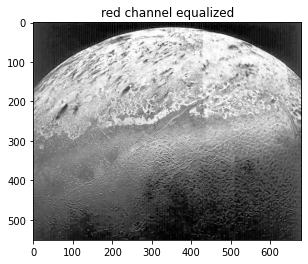

In [290]:
equalize_imgr3 = cv.equalizeHist(imgr3)
plt.imshow(equalize_imgr3,cmap='gray')
plt.title('red channel equalized')

Text(0.5, 1.0, 'equalized RGB image')

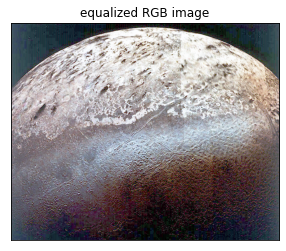

In [295]:
img3_histogram1 = cv.merge([equalize_imgr3,equalize_imgg3,equalize_imgb3])
plt.imshow(img3_histogram1),plt.xticks([]),plt.yticks([])
img3_histogram1 = cv.cvtColor(img3_histogram1,cv.COLOR_BGR2RGB)
cv.imwrite('img3_equ.png',img3_histogram1)
plt.title('equalized RGB image')

We can see in the above image how histogram equalization has revealed more details ecspecially in the lower half of the image. Although details has increased, the contrast of the image has degraded. Let's use Contrast Limited Adaptive Histogram Equalization(CLHAE), a opencv class for adaptive histogram equalization and doesn't alter the contrast much

Text(0.5, 1.0, 'CLHAE blue channel')

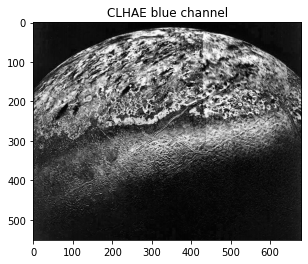

In [296]:
final_img_b3 = cv.createCLAHE(clipLimit = 2).apply(imgb3)
plt.imshow(final_img_b3,cmap='gray')
plt.title('CLHAE blue channel')
#I looked up about CLHAE form geeksforgeeks website https://www.geeksforgeeks.org/clahe-histogram-eqalization-opencv/

Text(0.5, 1.0, 'CLHAE green channel')

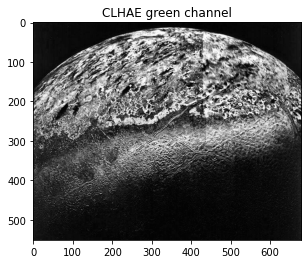

In [297]:
final_img_g3 = cv.createCLAHE(clipLimit = 2).apply(imgg3)
plt.imshow(final_img_g3,cmap='gray')
plt.title('CLHAE green channel')

Text(0.5, 1.0, 'CLHAE red channel')

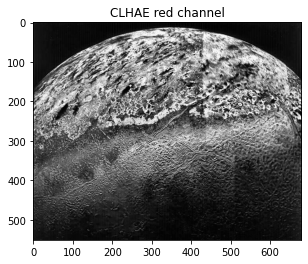

In [298]:
final_img_r3 = cv.createCLAHE(clipLimit = 2).apply(imgr3)
plt.imshow(final_img_r3,cmap='gray')
plt.title('CLHAE red channel')

True

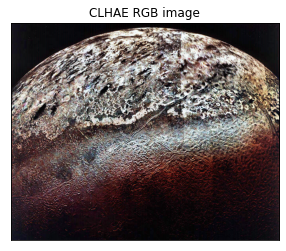

In [302]:
img3_histogram2 = cv.merge([final_img_r3,final_img_g3,final_img_b3])
plt.imshow(img3_histogram2),plt.xticks([]),plt.yticks([])
plt.title('CLHAE RGB image')
img3_histogram2=cv.cvtColor(img3_histogram2,cv.COLOR_BGR2RGB)
cv.imwrite('three.png',img3_histogram2)

We can see that CLHAE RGB image increases details and at the same time doesn't alter image contrast much

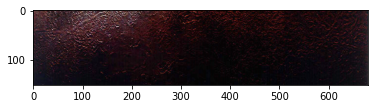

In [305]:
img3_histogram2=cv.cvtColor(img3_histogram2,cv.COLOR_RGB2BGR)
plt.imshow(img3_histogram2[400:,:])

We see in here that because of histogram equalization, there are scanlines. Let's remove them by frequency domain filtering

Text(0.5, 1.0, 'DFT magnitude response')

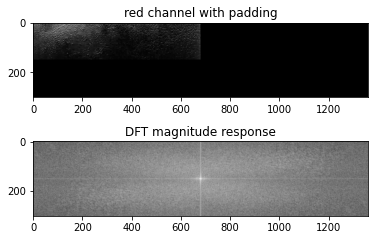

In [308]:
rows,cols = final_img_r3[400:,:].shape
padding = np.zeros((2*rows,2*cols))
padding[:rows,:cols]=final_img_r3[400:,:]
r3_part = padding

dftrp3 = cv.dft(np.float32(r3_part),flags=cv.DFT_COMPLEX_OUTPUT)
dftrp3_shift = np.fft.fftshift(dftrp3)
mag_specrp3 = 20*np.log(cv.magnitude(dftrp3_shift[:,:,0],dftrp3_shift[:,:,1]))

plt.subplot(211), plt.imshow(r3_part,cmap='gray')#,plt.xticks([]),plt.yticks([])
plt.title('red channel with padding')
plt.subplot(212),plt.imshow(mag_specrp3,cmap='gray')#,plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude response')

Text(0.5, 1.0, 'DFT magnitude after applying mask')

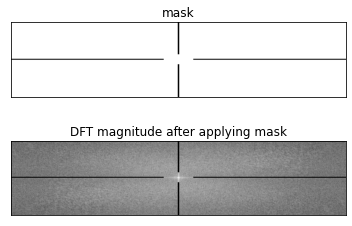

In [309]:
mask=np.ones((2*rows,2*cols))
mask[:130,677:683]=0
mask[170:,677:683]=0
mask[148:152,:620]=0
mask[148:152,740:]=0
mag_specrp3*=mask
plt.subplot(211), plt.imshow(mask,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('mask')
plt.subplot(212),plt.imshow(mag_specrp3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude after applying mask')

C:\Users\hp\AppData\Local\Temp\ipykernel_7936\30944222.py:10: RuntimeWarning: divide by zero encountered in log
  mag_ispecrp3 = np.log(cv.magnitude(fshift_rp3[:,:,0],fshift_rp3[:,:,1]))


Text(0.5, 1.0, 'DFT magnitude response')

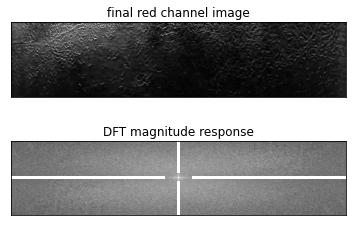

In [310]:
mask2 = np.zeros((2*rows,2*cols,2))
mask2[:,:,0]=mask
mask2[:,:,1]=mask

fshift_rp3 = dftrp3_shift*mask2
frp3_ishift = np.fft.ifftshift(fshift_rp3)
imgrp3_back = cv.idft(frp3_ishift)
imgrp3_back = cv.magnitude(imgrp3_back[:,:,0],imgrp3_back[:,:,1])
imgrp3 = imgrp3_back[:rows,:cols]
mag_ispecrp3 = np.log(cv.magnitude(fshift_rp3[:,:,0],fshift_rp3[:,:,1]))

plt.subplot(211),plt.imshow(imgrp3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('final red channel image')
plt.subplot(212),plt.imshow(mag_ispecrp3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude response')

In [311]:
maxrp3 = imgrp3.max()
imgrp3/=maxrp3
imgrp3*=255
imgrp3=imgrp3.astype(np.uint8)

Text(0.5, 1.0, 'red channel after removing scanlines')

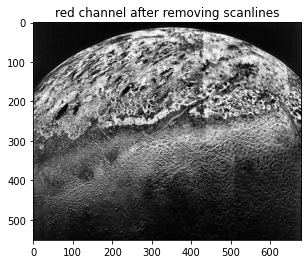

In [313]:
img_finalr3 = np.ones(final_img_r3.shape)
img_finalr3[:410,:]*=final_img_r3[:410,:]
img_finalr3[410:,:]*=imgrp3[10:,:]
plt.imshow(img_finalr3,cmap='gray')
plt.title('red channel after removing scanlines')

Text(0.5, 1.0, 'DFT magnitude response')

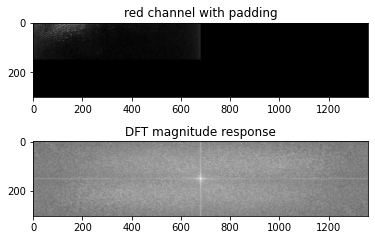

In [316]:
rows,cols = final_img_g3[400:,:].shape
padding = np.zeros((2*rows,2*cols))
padding[:rows,:cols]=final_img_g3[400:,:]
g3_part = padding

dftgp3 = cv.dft(np.float32(g3_part),flags=cv.DFT_COMPLEX_OUTPUT)
dftgp3_shift = np.fft.fftshift(dftgp3)
mag_specgp3 = 20*np.log(cv.magnitude(dftgp3_shift[:,:,0],dftgp3_shift[:,:,1]))

plt.subplot(211), plt.imshow(g3_part,cmap='gray')#,plt.xticks([]),plt.yticks([])
plt.title('red channel with padding')
plt.subplot(212),plt.imshow(mag_specgp3,cmap='gray')#,plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude response')

Text(0.5, 1.0, 'DFT magnitude after applying mask')

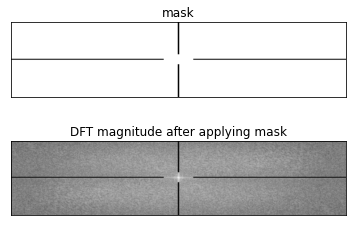

In [317]:
mask=np.ones((2*rows,2*cols))
mask[:130,677:683]=0
mask[170:,677:683]=0
mask[148:152,:620]=0
mask[148:152,740:]=0
mag_specgp3*=mask
plt.subplot(211), plt.imshow(mask,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('mask')
plt.subplot(212),plt.imshow(mag_specgp3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude after applying mask')

C:\Users\hp\AppData\Local\Temp\ipykernel_7936\274038368.py:10: RuntimeWarning: divide by zero encountered in log
  mag_ispecgp3 = np.log(cv.magnitude(fshift_gp3[:,:,0],fshift_gp3[:,:,1]))


Text(0.5, 1.0, 'DFT magnitude response')

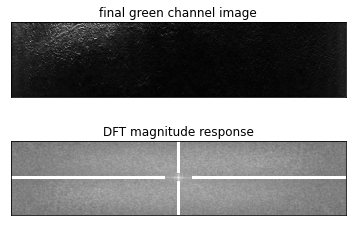

In [318]:
mask2 = np.zeros((2*rows,2*cols,2))
mask2[:,:,0]=mask
mask2[:,:,1]=mask

fshift_gp3 = dftgp3_shift*mask2
fgp3_ishift = np.fft.ifftshift(fshift_gp3)
imggp3_back = cv.idft(fgp3_ishift)
imggp3_back = cv.magnitude(imggp3_back[:,:,0],imggp3_back[:,:,1])
imggp3 = imggp3_back[:rows,:cols]
mag_ispecgp3 = np.log(cv.magnitude(fshift_gp3[:,:,0],fshift_gp3[:,:,1]))

plt.subplot(211),plt.imshow(imggp3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('final green channel image')
plt.subplot(212),plt.imshow(mag_ispecgp3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude response')

In [319]:
maxgp3 = imggp3.max()
imggp3/=maxgp3
imggp3*=255
imggp3=imggp3.astype(np.uint8)

Text(0.5, 1.0, 'green channel after removing scanlines')

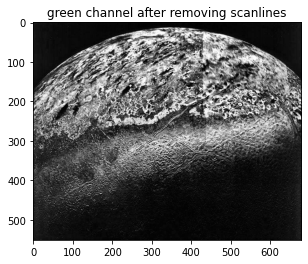

In [321]:
img_finalg3 = np.ones(final_img_g3.shape)
img_finalg3[:410,:]*=final_img_g3[:410,:]
img_finalg3[410:,:]*=imggp3[10:,:]
plt.imshow(img_finalg3,cmap='gray')
plt.title('green channel after removing scanlines')

Text(0.5, 1.0, 'DFT magnitude response')

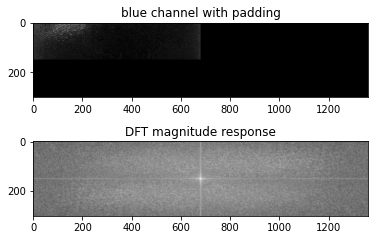

In [323]:
rows,cols = final_img_b3[400:,:].shape
padding = np.zeros((2*rows,2*cols))
padding[:rows,:cols]=final_img_b3[400:,:]
b3_part = padding

dftbp3 = cv.dft(np.float32(b3_part),flags=cv.DFT_COMPLEX_OUTPUT)
dftbp3_shift = np.fft.fftshift(dftbp3)
mag_specbp3 = 20*np.log(cv.magnitude(dftbp3_shift[:,:,0],dftbp3_shift[:,:,1]))

plt.subplot(211), plt.imshow(b3_part,cmap='gray')#,plt.xticks([]),plt.yticks([])
plt.title('blue channel with padding')
plt.subplot(212),plt.imshow(mag_specbp3,cmap='gray')#,plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude response')

Text(0.5, 1.0, 'DFT magnitude after applying mask')

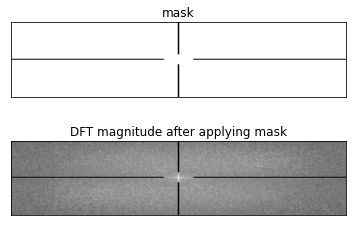

In [324]:
mask=np.ones((2*rows,2*cols))
mask[:130,677:683]=0
mask[170:,677:683]=0
mask[148:152,:620]=0
mask[148:152,740:]=0
mag_specbp3*=mask
plt.subplot(211), plt.imshow(mask,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('mask')
plt.subplot(212),plt.imshow(mag_specbp3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude after applying mask')

C:\Users\hp\AppData\Local\Temp\ipykernel_7936\3521891635.py:10: RuntimeWarning: divide by zero encountered in log
  mag_ispecbp3 = np.log(cv.magnitude(fshift_bp3[:,:,0],fshift_bp3[:,:,1]))


Text(0.5, 1.0, 'DFT magnitude response')

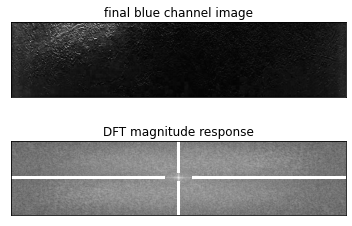

In [325]:
mask2 = np.zeros((2*rows,2*cols,2))
mask2[:,:,0]=mask
mask2[:,:,1]=mask

fshift_bp3 = dftbp3_shift*mask2
fbp3_ishift = np.fft.ifftshift(fshift_bp3)
imgbp3_back = cv.idft(fbp3_ishift)
imgbp3_back = cv.magnitude(imgbp3_back[:,:,0],imgbp3_back[:,:,1])
imgbp3 = imgbp3_back[:rows,:cols]
mag_ispecbp3 = np.log(cv.magnitude(fshift_bp3[:,:,0],fshift_bp3[:,:,1]))

plt.subplot(211),plt.imshow(imgbp3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('final blue channel image')
plt.subplot(212),plt.imshow(mag_ispecbp3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('DFT magnitude response')

In [326]:
maxbp3 = imgbp3.max()
imgbp3/=maxbp3
imgbp3*=255
imgbp3=imgbp3.astype(np.uint8)

Text(0.5, 1.0, 'blue channel after removing scanlines')

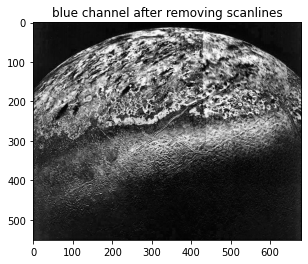

In [327]:
img_finalb3 = np.ones(final_img_b3.shape)
img_finalb3[:410,:]*=final_img_b3[:410,:]
img_finalb3[410:,:]*=imgbp3[10:,:]
plt.imshow(img_finalb3,cmap='gray')
plt.title('blue channel after removing scanlines')

Text(0.5, 1.0, 'Final RGB image')

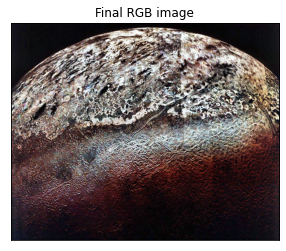

In [329]:
img3_final_result = cv.merge([img_finalr3,img_finalg3,img_finalb3])
img3_final_result=np.array(img3_final_result,dtype=np.uint8)
plt.imshow(img3_final_result),plt.xticks([]),plt.yticks([])
plt.title('Final RGB image')

In [135]:
img3_final_result=cv.cvtColor(img3_final_result,cv.COLOR_BGR2RGB)
cv.imwrite('img3.png',img3_final_result)

True

**Q4) A picture of car blurred due to relative motion of the camera is given. Restore and enhance the image to reveal the numbers and letters on the number plate**

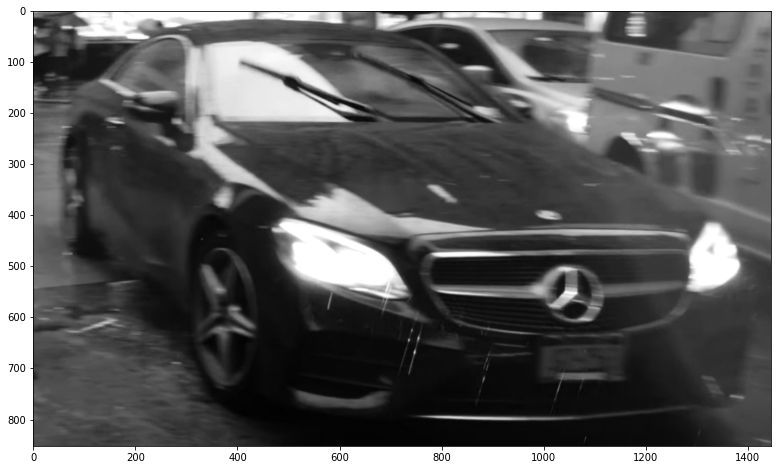

In [20]:
img4 = cv.imread('MakeNumberPlateReadable.jpg',0)
img4.shape
plt.figure(figsize=(14,8))
plt.imshow(img4,cmap='gray')
(rows,cols)=img4.shape

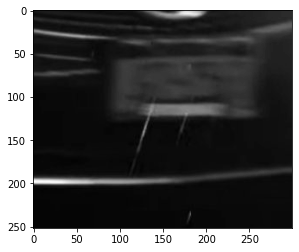

In [21]:
img4_part=img4[600:,900:1200]
plt.imshow(img4_part,cmap='gray')

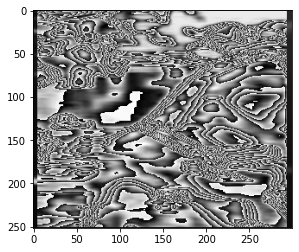

In [22]:
(row,col)=img4_part.shape
for i in range(row-2):
    for j in range(col-11):
        img4_part[i+1,j+5]=np.mean(img4[i:i+2,j:j+11]*np.ones((2,11)))*22
plt.imshow(img4_part,cmap='gray')

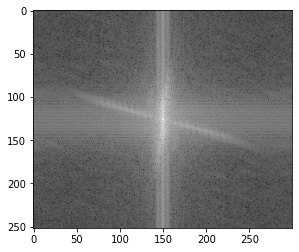

In [110]:
#img4_part=np.imag(img4)[600:,900:1200]
dft4_part = cv.dft(np.float32(img4_part),flags=cv.DFT_COMPLEX_OUTPUT)
dft4_part_shift = np.fft.fftshift(dft4_part)
mag_spec4_part = 20*np.log(cv.magnitude(dft4_part_shift[:,:,0],dft4_part_shift[:,:,1]))
plt.imshow(mag_spec4_part,cmap='gray')

The image seems to contain a lot of noises, let's remove noises like the prominent inclined line and others preserving the image data.

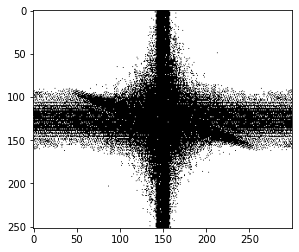

In [111]:
mask = np.where(mag_spec4_part>120,0,255)
plt.figure(figsize=(8,4))
plt.imshow(mask,cmap='gray')

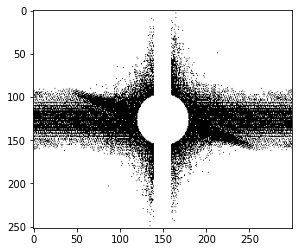

In [231]:
cv.circle(mask,(150,126),30,255,-1)#cv.circle() draws a circle with given center and given radius
mask[:,140:160]=255
plt.figure(figsize=(8,4))
plt.imshow(mask,cmap='gray')

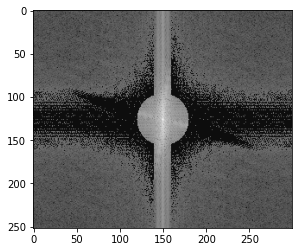

In [232]:
plt.imshow(mag_spec4_part*mask,cmap='gray')

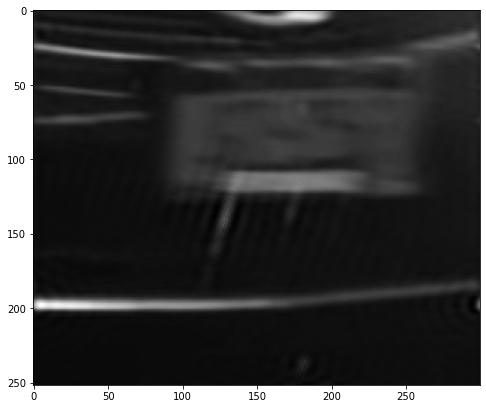

In [239]:
(rows,cols)=img4_part.shape
mask2 = np.zeros((rows,cols,2))
mask2[:,:,0]=mask
mask2[:,:,1]=mask

fshift_4part = dft4_part_shift*mask2
f4part_ishift = np.fft.ifftshift(fshift_4part)
img4_part_back = cv.idft(f4part_ishift)
img4_part_back = cv.magnitude(img4_part_back[:,:,0],img4_part_back[:,:,1])
plt.figure(figsize=(8,8))
plt.imshow(img4_part_back,cmap='gray')
#imgbp3 = imgbp3_back[:rows,:cols]
#mag_ispecbp3 = np.log(cv.magnitude(fshift_bp3[:,:,0],fshift_bp3[:,:,1]))

The numbers in the number plate are still not clear, let's try thresholding

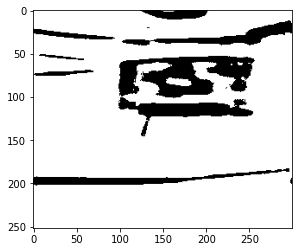

In [291]:
img4_part_back*=(255/img4_part_back.max())
limit=np.where(img4_part_back<54.7,255,0)
plt.imshow(limit,cmap='gray')

Thresholding reveals some details, the number might be something like "5-5 "

**Estimation by modelling**

True

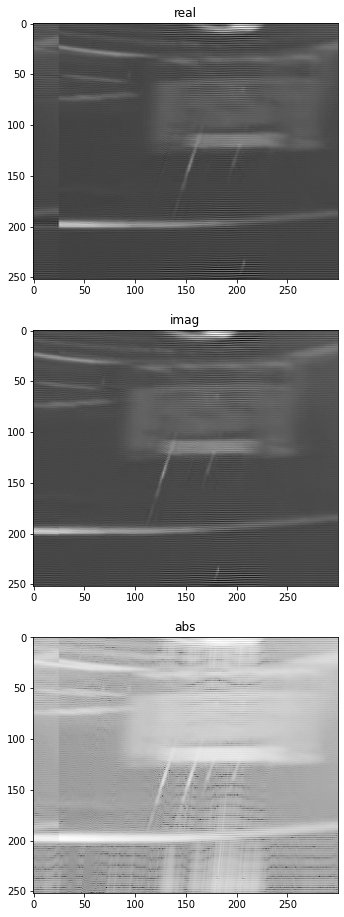

In [296]:
(rows,cols)=img4_part.shape
distortion_dft = np.ones((rows,cols),dtype=np.complex_)
a=1
b=-0.085
#c=0.00009
#d=0.0001
for i in range(0,rows):
    for j in range(0,cols):
        distortion_dft[i,j] = (np.sinc(a*i+b*j)*(np.cos(np.pi*(a*i+b*j))-1j*np.sin(np.pi*(a*i+b*j))))#*np.exp(-c*(i**2)-d*(j**2)))*1000
#c = 10000*np.abs(distortion_dft)
#c*=255
#c=c.astype(np.uint8)

dft4 = np.fft.fft2(img4_part)
fshift4 = np.fft.fftshift(dft4)
mag_spec4 = 20*np.log(np.abs(fshift4))

k=0.1
dft4_approx=np.divide(( (np.abs(distortion_dft)**2) * fshift4 ) , ( distortion_dft * (np.abs(distortion_dft)**2 + k) ))
mag_spec4_approx=20*np.log(np.abs(dft4_approx))

f_ishift4_approx = np.fft.ifftshift(dft4_approx)
img4_approx = np.fft.ifft2(f_ishift4_approx)
#img4_approx = np.real(img4_approx)

plt.figure(figsize=(20,16))
plt.subplot(311),
plt.imshow(np.real(img4_approx),cmap='gray')
plt.title('real')
plt.subplot(312),plt.imshow(np.imag(img4_approx),cmap='gray')
plt.title('imag')
plt.subplot(313),plt.imshow(np.log(np.abs(img4_approx)),cmap='gray')
plt.title('abs')

cv.imwrite('img4_approx.png',np.imag(img4_approx))

Motion blur is modelled as in pg.356 of 'Digital Image Processing by Gonzalez and Woods'. a and b are valued such that
b/a=tan(angle of blurr). It was estimated to be around -5 degree. Just motion blurring didn't give good results, so I tried including guassian blur as well but that degraded the image furthur

I couldn't find the exact number in the plate but from the results I obtained, I make a guess that the number may be "545"

**Q5) ML-based image restoration**

**a. Select a few images from your personal collection, and divide them into good and bad images**

(<matplotlib.image.AxesImage at 0x1fffb626370>, ([], []), ([], []))

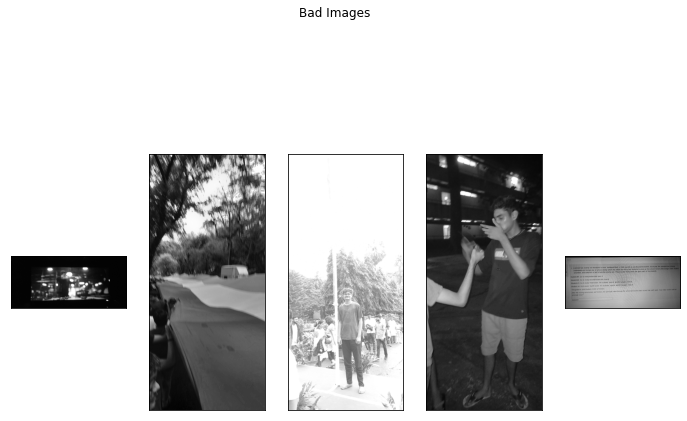

In [3]:
bad1=cv.imread('bad1.jpg',0)
bad2=cv.imread('bad2.jpg',0)
bad3=cv.imread('bad3.jpg',0)
bad4=cv.imread('bad4.jpg',0)
bad5=cv.imread('bad5.jpg',0)
plt.figure(figsize=(12,8))
plt.suptitle('Bad Images')
plt.subplot(151)
plt.imshow(bad1,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(152)
plt.imshow(bad2,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(153)
plt.imshow(bad3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(154)
plt.imshow(bad4,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(155)
plt.imshow(bad5,cmap='gray'),plt.xticks([]),plt.yticks([])

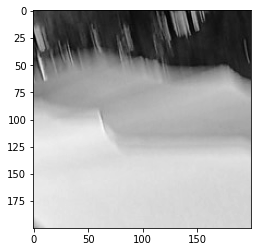

In [61]:
plt.imshow(bad2[900:1100,350:550],cmap='gray')

(<matplotlib.image.AxesImage at 0x1fffe581700>, ([], []), ([], []))

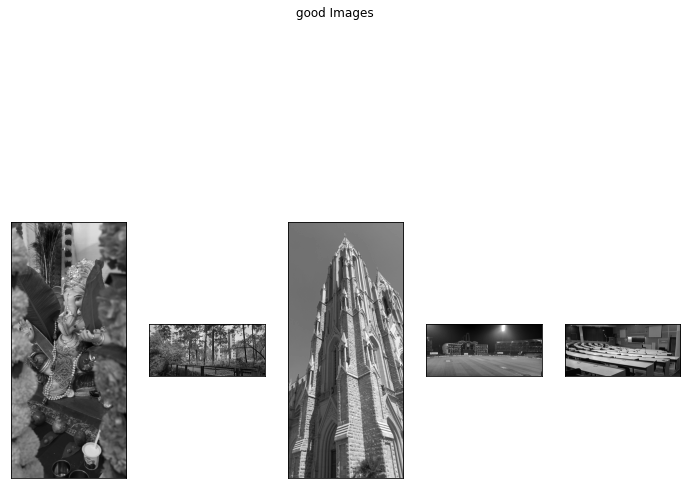

In [4]:
good1=cv.imread('good1.jpg',0)
good2=cv.imread('good2.jpg',0)
good3=cv.imread('good3.jpg',0)
good4=cv.imread('good4.jpg',0)
good5=cv.imread('good5.jpg',0)
good6=cv.imread('good6.jpg',0)
good7=cv.imread('good7.jpg',0)
good8=cv.imread('good8.jpg',0)
good9=cv.imread('good9.jpg',0)
good10=cv.imread('good10.jpg',0)
plt.figure(figsize=(12,10))
plt.suptitle('good Images')
plt.subplot(151)
plt.imshow(good1,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(152)
plt.imshow(good2,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(153)
plt.imshow(good3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(154)
plt.imshow(good4,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(155)
plt.imshow(good5,cmap='gray'),plt.xticks([]),plt.yticks([])

(<matplotlib.image.AxesImage at 0x1ff807a9160>, ([], []), ([], []))

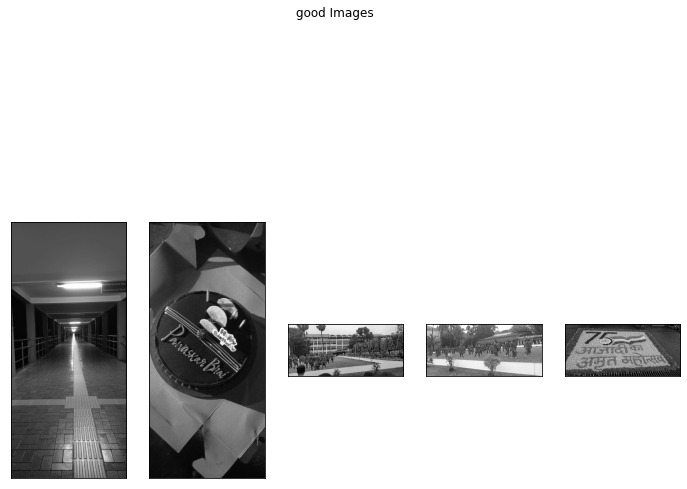

In [5]:
plt.figure(figsize=(12,10))
plt.suptitle('good Images')
plt.subplot(151)
plt.imshow(good6,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(152)
plt.imshow(good7,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(153)
plt.imshow(good8,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(154)
plt.imshow(good9,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(155)
plt.imshow(good10,cmap='gray'),plt.xticks([]),plt.yticks([])

In [6]:
good1.shape

(2000, 900)

**b. For bad images, try to figure out the degradation process (contrast, brightness, blurring, noise)**

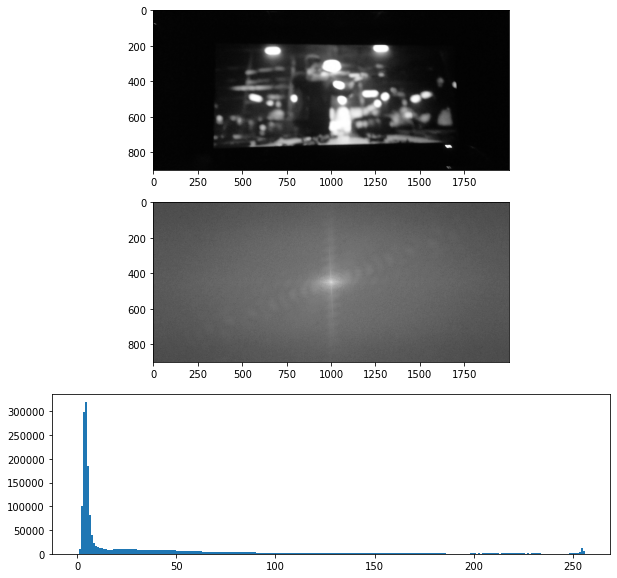

In [7]:
dft_b1=cv.dft(np.float32(bad1),flags=cv.DFT_COMPLEX_OUTPUT)
fshift_b1=np.fft.fftshift(dft_b1)
mag_spec_b1=np.log(cv.magnitude(fshift_b1[:,:,0],fshift_b1[:,:,1]))

plt.figure(figsize=(10,10))
plt.subplot(311)
plt.imshow(bad1,cmap='gray')
plt.subplot(312)
plt.imshow(mag_spec_b1,cmap='gray')
plt.subplot(313)
plt.hist(bad1.ravel(),256,[0,256])
plt.show()

The image seems to have guassian blur. We can ringing pattern in the dft plt due to the sharp trasition from image to the black region along all four sides.

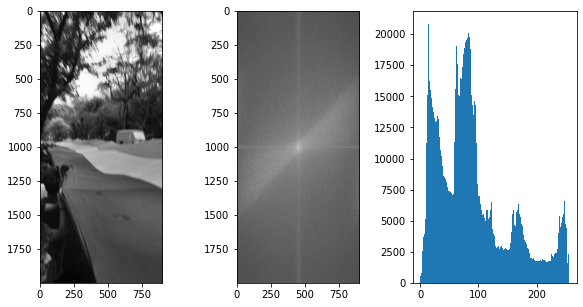

In [8]:
dft_b2=cv.dft(np.float32(bad2),flags=cv.DFT_COMPLEX_OUTPUT)
fshift_b2=np.fft.fftshift(dft_b2)
mag_spec_b2=np.log(cv.magnitude(fshift_b2[:,:,0],fshift_b2[:,:,1]))

plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(bad2,cmap='gray')
plt.subplot(132)
plt.imshow(mag_spec_b2,cmap='gray')
plt.subplot(133)
plt.hist(bad2.ravel(),256,[0,256])
plt.show()

The image seems to have some blurring by looking at the spatial signal(image). In the histogram, there are four peaks and one of them(first form left) seems like exponential noise, another(third form left) seems like Rayleigh noise

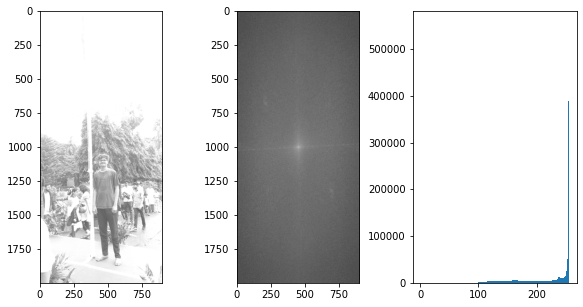

In [9]:
dft_b3=cv.dft(np.float32(bad3),flags=cv.DFT_COMPLEX_OUTPUT)
fshift_b3=np.fft.fftshift(dft_b3)
mag_spec_b3=np.log(cv.magnitude(fshift_b3[:,:,0],fshift_b3[:,:,1]))

plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(bad3,cmap='gray')
plt.subplot(132)
plt.imshow(mag_spec_b3,cmap='gray')
plt.subplot(133)
plt.hist(bad3.ravel(),256,[0,256])
plt.show()

We can see form the image that it's brightness is very high due to which it has bad contrast. In the histogram we can see a big pulse at 255, which means the image has salt noise

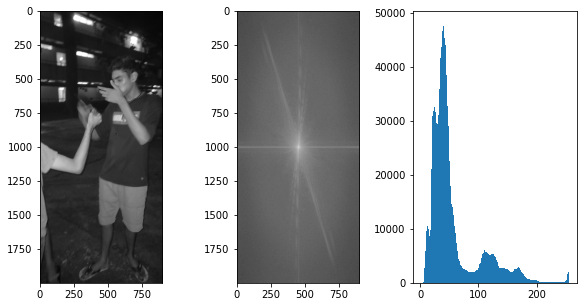

In [10]:
dft_b4=cv.dft(np.float32(bad4),flags=cv.DFT_COMPLEX_OUTPUT)
fshift_b4=np.fft.fftshift(dft_b4)
mag_spec_b4=np.log(cv.magnitude(fshift_b4[:,:,0],fshift_b4[:,:,1]))

plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(bad4,cmap='gray')
plt.subplot(132)
plt.imshow(mag_spec_b4,cmap='gray')
plt.subplot(133)
plt.hist(bad4.ravel(),256,[0,256])
plt.show()

We can see in the image that there is motion blur. From the dft magnitude plot we can also infer that there are prominent vertical scanlines in the image

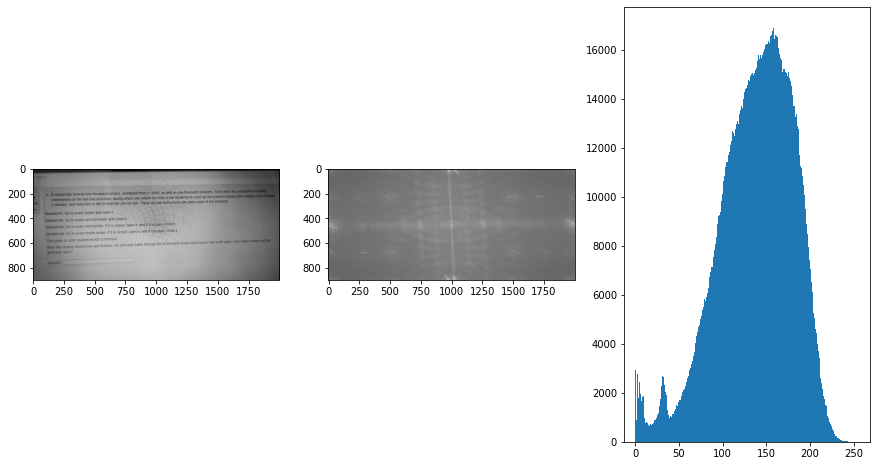

In [11]:
dft_b5=cv.dft(np.float32(bad5),flags=cv.DFT_COMPLEX_OUTPUT)
fshift_b5=np.fft.fftshift(dft_b5)
mag_spec_b5=np.log(cv.magnitude(fshift_b5[:,:,0],fshift_b5[:,:,1]))

plt.figure(figsize=(15,8))
plt.subplot(131)
plt.imshow(bad5,cmap='gray')
plt.subplot(132)
plt.imshow(mag_spec_b5,cmap='gray')
plt.subplot(133)
plt.hist(bad5.ravel(),256,[0,256])
plt.show()

We can see conjugate pulses in the dft magnitude plot which implies periodic noise. We can also see ringing patterns(moire like) in the image

**d. Degrade the good images using the degradation process - contrast and brightness change, blurring,
noise.**

In [12]:
tr1=cv.GaussianBlur(np.float32(good1),(19,19),0)

tr2=cv.blur(np.float32(good2),(11,11),0)

tr3=good4
(rows,cols)=tr3.shape
for i in range(0,rows):
    for j in range(0,cols):
        if np.random.choice([1,0],p=[0.2,0.8])==1:
            tr3[i,j]=255

tr4=good3
(rows,cols)=tr4.shape
for i in range(0,rows):
    for j in range(0,cols):
        if np.random.choice([1,0],p=[0.2,0.8])==1:
            tr4[i,j]=0

tr5=good5
(rows,cols)=tr5.shape
motion_kernal=np.zeros((5,5))
for i in range(0,4):
    motion_kernal[i,4-i]=0.25
for i in range(rows-rows//3,rows-5):
    for j in range(cols-cols//3,cols-5):
        tr5[i+3,j+3]=sum(sum(tr5[i:i+5,j:j+5]*motion_kernal))

tr6=good7
(rows,cols)=tr6.shape
for i in range(0,rows//5):
    tr6[i*5,:]*=2

tr7=good9
(rows,cols)=tr7.shape
for i in range(0,rows):
    for j in range(0,cols):
        tr7[i,j]+=np.random.normal(loc=0.0,scale=20)

tr8=good8
(rows,cols)=tr8.shape
for i in range(0,rows):
    for j in range(0,cols):
        tr7[i,j]+=10*np.random.rayleigh(scale=1)
tr9=good6
tr9=tr9**0.4

tr10=good1
(rows,cols)=tr10.shape
for i in range(0,rows):
    for j in range(0,cols):
        if np.random.choice([1,0,-1],p=[0.15,0.7,0.15])==1:
            tr10[i,j]=255
        elif np.random.choice([1,0,-1],p=[0.15,0.7,0.15])==-1:
            tr10[i,j]=0

List of training and validating images and the process of degradation are,
tr1 -> Guassian blur(training)
tr2 -> Mean blur
tr3 -> Salt noise(training)
tr4 -> Pepper noise(training)
tr5 -> Motion blur(training)
tr6 -> Scanlines
tr7 -> Guassian noise(training)
tr8 -> Rayleigh noise
tr9 -> Brightness(training)
tr10 -> Salt&Pepper noise

**e. Create a table of size NxW2 or Nx3W2 where N is the number of patches of size WxWx1 or WxWx3
mined from the degraded versions of the training images. Correspondingly, mine their associated original central pixel of size Nx3 or Nx1**

In [ ]:
for m in range(15,36,2):
    w=m
    X=np.zeros((6,3000,w**2))
    y=np.zeros((6,3000))
    X_val=np.zeros((4,3000,w**2))
    y_val=np.zeros((4,3000))

    (rows,cols)=tr1.shape
    a=np.arange(w//2,rows-w//2)
    b=np.arange(w//2,cols-w//2)
    for i in range(0,3000):
        rand1=np.random.choice(a,replace=True)
        rand2=np.random.choice(b,replace=True)
        X[0,i,:]=tr1[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
        y[0,i]=tr1[rand1,rand2]-good1[rand1,rand2]

    (rows,cols)=tr3.shape
    a=np.arange(w//2,rows-w//2)
    b=np.arange(w//2,cols-w//2)
    for i in range(0,3000):
        rand1=np.random.choice(a,replace=True)
        rand2=np.random.choice(b,replace=True)
        X[1,i,:]=tr3[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
        y[1,i]=tr3[rand1,rand2]-good4[rand1,rand2]

    (rows,cols)=tr4.shape
    a=np.arange(w//2,rows-w//2)
    b=np.arange(w//2,cols-w//2)
    for i in range(0,3000):
        rand1=np.random.choice(a,replace=True)
        rand2=np.random.choice(b,replace=True)
        X[2,i,:]=tr4[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
        y[2,i]=tr4[rand1,rand2]-good3[rand1,rand2]

    (rows,cols)=tr5.shape
    a=np.arange(w//2,rows-w//2)
    b=np.arange(w//2,cols-w//2)
    for i in range(0,3000):
        rand1=np.random.choice(a,replace=True)
        rand2=np.random.choice(b,replace=True)
        X[3,i,:]=tr5[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
        y[3,i]=tr5[rand1,rand2]-good5[rand1,rand2]

    (rows,cols)=tr7.shape
    a=np.arange(w//2,rows-w//2)
    b=np.arange(w//2,cols-w//2)
    for i in range(0,3000):
        rand1=np.random.choice(a,replace=True)
        rand2=np.random.choice(b,replace=True)
        X[4,i,:]=tr7[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
        y[4,i]=tr7[rand1,rand2]-good9[rand1,rand2]

    (rows,cols)=tr9.shape
    a=np.arange(w//2,rows-w//2)
    b=np.arange(w//2,cols-w//2)
    for i in range(0,3000):
        rand1=np.random.choice(a,replace=True)
        rand2=np.random.choice(b,replace=True)
        X[5,i,:]=tr9[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
        y[5,i]=tr9[rand1,rand2]-good6[rand1,rand2]

    (rows,cols)=tr2.shape
    a=np.arange(w//2,rows-w//2)
    b=np.arange(w//2,cols-w//2)
    for i in range(0,3000):
        rand1=np.random.choice(a,replace=True)
        rand2=np.random.choice(b,replace=True)
        X_val[0,i,:]=tr2[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
        y_val[0,i]=tr2[rand1,rand2]-good2[rand1,rand2]

    (rows,cols)=tr6.shape
    a=np.arange(w//2,rows-w//2)
    b=np.arange(w//2,cols-w//2)
    for i in range(0,3000):
        rand1=np.random.choice(a,replace=True)
        rand2=np.random.choice(b,replace=True)
        X_val[1,i,:]=tr6[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
        y_val[1,i]=tr6[rand1,rand2]-good7[rand1,rand2]

    (rows,cols)=tr8.shape
    a=np.arange(w//2,rows-w//2)
    b=np.arange(w//2,cols-w//2)
    for i in range(0,3000):
        rand1=np.random.choice(a,replace=True)
        rand2=np.random.choice(b,replace=True)
        X_val[2,i,:]=tr8[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
        y_val[2,i]=tr8[rand1,rand2]-good8[rand1,rand2]

    (rows,cols)=tr10.shape
    a=np.arange(w//2,rows-w//2)
    b=np.arange(w//2,cols-w//2)
    for i in range(0,3000):
        rand1=np.random.choice(a,replace=True)
        rand2=np.random.choice(b,replace=True)
        X_val[3,i,:]=tr10[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
        y_val[3,i]=tr10[rand1,rand2]-good1[rand1,rand2]

    error=np.zeros((5,5))
    for i in range(5):
        for j in range(5):
            regressor=SVR(kernel='rbf',C=(1e-2)*(10**i),epsilon=(1e-2)*(10**j),gamma='scale')
            for k in range(6):
                regressor.fit(X[k],y[k])
            y_pred=regressor.predict(X_val[0])
            error[i,j]+=mean_squared_error(y_pred,y[0],squared=False)
    print(m,error.min())

Running the above code, almost all the w values give reasonably close minimum mean square error value for 1st training image. Let's see for other images taking w=19

In [311]:
w=19
X=np.zeros((6,3000,w**2))
y=np.zeros((6,3000))
X_val=np.zeros((4,3000,w**2))
y_val=np.zeros((4,3000))

(rows,cols)=tr1.shape
a=np.arange(w//2,rows-w//2)
b=np.arange(w//2,cols-w//2)
for i in range(0,3000):
    rand1=np.random.choice(a,replace=True)
    rand2=np.random.choice(b,replace=True)
    X[0,i,:]=tr1[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
    y[0,i]=tr1[rand1,rand2]-good1[rand1,rand2]

(rows,cols)=tr3.shape
a=np.arange(w//2,rows-w//2)
b=np.arange(w//2,cols-w//2)
for i in range(0,3000):
    rand1=np.random.choice(a,replace=True)
    rand2=np.random.choice(b,replace=True)
    X[1,i,:]=tr3[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
    y[1,i]=tr3[rand1,rand2]-good4[rand1,rand2]

(rows,cols)=tr4.shape
a=np.arange(w//2,rows-w//2)
b=np.arange(w//2,cols-w//2)
for i in range(0,3000):
    rand1=np.random.choice(a,replace=True)
    rand2=np.random.choice(b,replace=True)
    X[2,i,:]=tr4[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
    y[2,i]=tr4[rand1,rand2]-good3[rand1,rand2]

(rows,cols)=tr5.shape
a=np.arange(w//2,rows-w//2)
b=np.arange(w//2,cols-w//2)
for i in range(0,3000):
    rand1=np.random.choice(a,replace=True)
    rand2=np.random.choice(b,replace=True)
    X[3,i,:]=tr5[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
    y[3,i]=tr5[rand1,rand2]-good5[rand1,rand2]

(rows,cols)=tr7.shape
a=np.arange(w//2,rows-w//2)
b=np.arange(w//2,cols-w//2)
for i in range(0,3000):
    rand1=np.random.choice(a,replace=True)
    rand2=np.random.choice(b,replace=True)
    X[4,i,:]=tr7[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
    y[4,i]=tr7[rand1,rand2]-good9[rand1,rand2]

(rows,cols)=tr9.shape
a=np.arange(w//2,rows-w//2)
b=np.arange(w//2,cols-w//2)
for i in range(0,3000):
    rand1=np.random.choice(a,replace=True)
    rand2=np.random.choice(b,replace=True)
    X[5,i,:]=tr9[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
    y[5,i]=tr9[rand1,rand2]-good6[rand1,rand2]

(rows,cols)=tr2.shape
a=np.arange(w//2,rows-w//2)
b=np.arange(w//2,cols-w//2)
for i in range(0,3000):
    rand1=np.random.choice(a,replace=True)
    rand2=np.random.choice(b,replace=True)
    X_val[0,i,:]=tr2[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
    y_val[0,i]=tr2[rand1,rand2]-good2[rand1,rand2]

(rows,cols)=tr6.shape
a=np.arange(w//2,rows-w//2)
b=np.arange(w//2,cols-w//2)
for i in range(0,3000):
    rand1=np.random.choice(a,replace=True)
    rand2=np.random.choice(b,replace=True)
    X_val[1,i,:]=tr6[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
    y_val[1,i]=tr6[rand1,rand2]-good7[rand1,rand2]

(rows,cols)=tr8.shape
a=np.arange(w//2,rows-w//2)
b=np.arange(w//2,cols-w//2)
for i in range(0,3000):
    rand1=np.random.choice(a,replace=True)
    rand2=np.random.choice(b,replace=True)
    X_val[2,i,:]=tr8[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
    y_val[2,i]=tr8[rand1,rand2]-good8[rand1,rand2]

(rows,cols)=tr10.shape
a=np.arange(w//2,rows-w//2)
b=np.arange(w//2,cols-w//2)
for i in range(0,3000):
    rand1=np.random.choice(a,replace=True)
    rand2=np.random.choice(b,replace=True)
    X_val[3,i,:]=tr10[rand1-w//2:rand1+(w//2)+1,rand2-w//2:rand2+(w//2)+1].ravel()
    y_val[3,i]=tr10[rand1,rand2]-good1[rand1,rand2]
#I looked up numpy functions to generate random values from numpy.random official documentation

19


**Regression model**

In [79]:
for i in range(5):
        for j in range(5):
            regressor=SVR(kernel='rbf',C=(1e-2)*(10**i),epsilon=(1e-2)*(10**j),gamma='scale')
            for k in range(6):
                regressor.fit(X[k],y[k])
            y_pred=regressor.predict(X_val[1])
            print(i,j,mean_squared_error(y_pred,y[1],squared=False))

0 0 71.03968681457901
0 1 71.0329659898062
0 2 70.98506756727109
0 3 68.39764072398307
0 4 104.32460220998863
1 0 64.4991926985438
1 1 64.51620589890432
1 2 64.57505130465027
1 3 65.42612729331677
1 4 105.84752033055327
2 0 65.41642629005905
2 1 65.4607498749522
2 2 66.11608554566132
2 3 70.25454489408936
2 4 110.28203000494774
3 0 63.234187169474495
3 1 63.23845236222302
3 2 63.89189412077324
3 3 73.1738014949948
3 4 113.26661637713278
4 0 76.11555727108447
4 1 76.38910252199685
4 2 79.11556351656753
4 3 87.87391149057795
4 4 114.8227780285996


In [298]:
for i in range(5):
        for j in range(5):
            regressor=SVR(kernel='rbf',C=(1e-2)*(10**i),epsilon=(1e-2)*(10**j),gamma='scale')
            for k in range(6):
                regressor.fit(X[k],y[k])
            y_pred=regressor.predict(X_val[2])
            print(i,j,mean_squared_error(y_pred,y[2],squared=False))

0 0 70.72448358132777
0 1 70.68325805787741
0 2 70.60450679039369
0 3 68.09429921470502
0 4 104.2676252952722
1 0 64.19407200606584
1 1 64.19853247025677
1 2 64.06980358081906
1 3 65.06859216447879
1 4 106.28764996327689
2 0 64.39884385895172
2 1 64.48715232316034
2 2 64.99216023690576
2 3 68.78182644049409
2 4 110.32824577100644
3 0 62.47320770416246
3 1 62.603697582291154
3 2 64.14779535069799
3 3 71.34710843706233
3 4 111.64646659337413
4 0 75.96805270532113
4 1 76.32414092320981
4 2 79.06660010117196
4 3 82.6260028519007
4 4 112.47082276566799


In [299]:
for i in range(5):
        for j in range(5):
            regressor=SVR(kernel='rbf',C=(1e-2)*(10**i),epsilon=(1e-2)*(10**j),gamma='scale')
            for k in range(6):
                regressor.fit(X[k],y[k])
            y_pred=regressor.predict(X_val[3])
            print(i,j,mean_squared_error(y_pred,y[3],squared=False))

0 0 70.72265134169697
0 1 70.68142575483134
0 2 70.6026758046257
0 3 68.0927155048752
0 4 104.26757126820651
1 0 64.18263299775019
1 1 64.18710039590013
1 2 64.0584016105088
1 3 65.05855276584631
1 4 106.28712182922567
2 0 64.37814285744298
2 1 64.46651188354515
2 2 64.97162098690511
2 3 68.761286920744
2 4 110.32497752514266
3 0 62.44091839536565
3 1 62.57141987637832
3 2 64.11618304535618
3 3 71.31887021578602
3 4 111.64104838748726
4 0 75.94207512652697
4 1 76.29850249390813
4 2 79.04350569385834
4 3 82.59925850565159
4 4 112.46494653340984


In [301]:
for i in range(5):
        for j in range(5):
            regressor=SVR(kernel='rbf',C=(1e-2)*(10**i),epsilon=(1e-2)*(10**j),gamma='scale')
            for k in range(6):
                regressor.fit(X[k],y[k])
            y_pred=regressor.predict(X_val[0])
            print(i,j,mean_squared_error(y_pred,y[0],squared=False))

0 0 93.41932471439321
0 1 93.39507167870471
0 2 93.34877754274912
0 3 91.89641227152586
0 4 116.36392025394073
1 0 89.7238650563469
1 1 89.72627760779082
1 2 89.65688702056696
1 3 90.20011741645952
1 4 117.90738947912587
2 0 89.82544947507826
2 1 89.87331116283208
2 2 90.14807066468467
2 3 92.27255432429035
2 4 121.03522702556845
3 0 88.78311931231926
3 1 88.85181612244128
3 2 89.67556396037074
3 3 93.75907695104307
3 4 122.06616357958808
4 0 96.56223765561562
4 1 96.78481379720415
4 2 98.52574172285618
4 3 100.84929801616927
4 4 122.71435226040099


In [302]:
X_val[0].shape

(3000, 289)

Looking at all the data, let's try the values
w=19(chosen according to the image sizes and after trying different values fre w), 
C=1,
epsilon=0.01

**Applying the model to bad images**

In [313]:
regressor=SVR(kernel='rbf',C=1,epsilon=0.01,gamma='scale')
for k in range(6):
    regressor.fit(X[k],y[k])

In [314]:
bad1_part=bad1[300:600,400:750]
(rows,cols)=bad1_part.shape
pred1=np.zeros((rows-w,cols-w))

for i in range(0,rows-w):
    for j in range(0,cols-w):
        pred1[i,j]=regressor.predict(bad1_part[i:i+w,j:j+w].reshape(1,361))

Text(0.5, 1.0, 'input image')

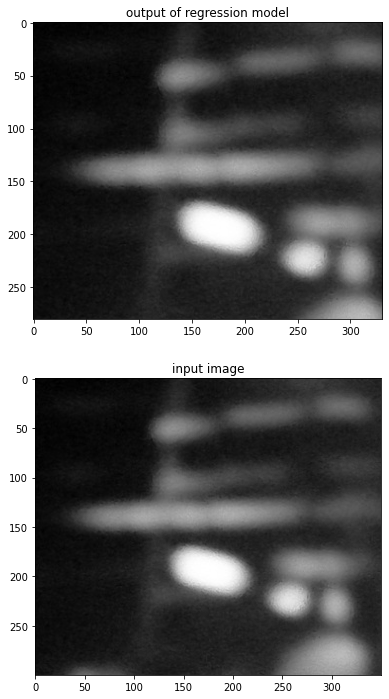

In [315]:
plt.figure(figsize=(12,12))
plt.subplot(211),
plt.imshow(pred1+bad1_part[0:rows-w,0:cols-w],cmap='gray')
plt.title('output of regression model')
plt.subplot(212),
plt.imshow(bad1_part,cmap='gray')
plt.title('input image')

The regression hasn't worked well although it has reduced the brightness in regions which have high density of bright pixels

In [316]:
bad2_part=bad2[700:1300,200:700]
(rows,cols)=bad2_part.shape
pred2=np.zeros((rows-w,cols-w))

for i in range(0,rows-w):
    for j in range(0,cols-w):
        pred2[i,j]=regressor.predict(bad2_part[i:i+w,j:j+w].reshape(1,361))

Text(0.5, 1.0, 'input image')

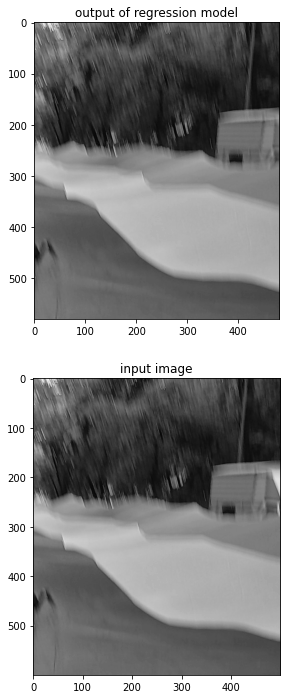

In [317]:
plt.figure(figsize=(12,12))
plt.subplot(211),
plt.imshow(pred2+bad2_part[0:rows-w,0:cols-w],cmap='gray')
plt.title('output of regression model')
plt.subplot(212),
plt.imshow(bad2_part,cmap='gray')
plt.title('input image')

In [318]:
bad3_part=bad3[900:1100,:300]
(rows,cols)=bad3_part.shape
pred3=np.zeros((rows-w,cols-w))

for i in range(0,rows-w):
    for j in range(0,cols-w):
        pred3[i,j]=regressor.predict(bad3_part[i:i+w,j:j+w].reshape(1,361))

Text(0.5, 1.0, 'input image')

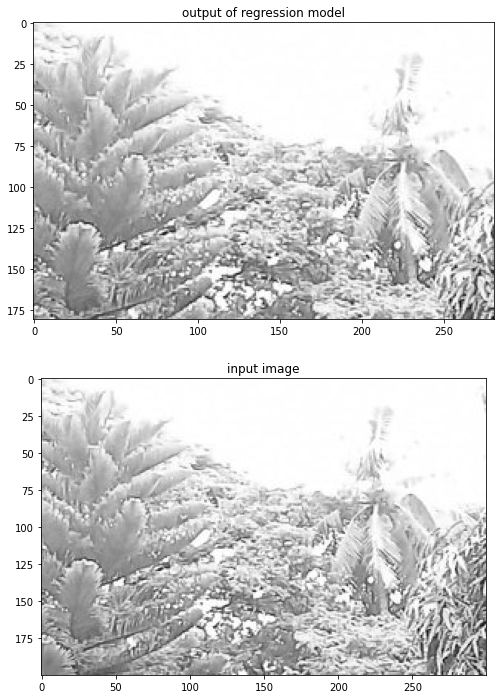

In [319]:
plt.figure(figsize=(12,12))
plt.subplot(211),
plt.imshow(pred3+bad3_part[0:181,0:281],cmap='gray')
plt.title('output of regression model')
plt.subplot(212),
plt.imshow(bad3_part,cmap='gray')
plt.title('input image')

In the tree on the left side of the image we can see how the model has slightly reduced the brightness 

In [320]:
bad4_part=bad4[550:850,150:450]
(rows,cols)=bad4_part.shape
pred4=np.zeros((rows-w,cols-w))

for i in range(0,rows-w):
    for j in range(0,cols-w):
        pred4[i,j]=regressor.predict(bad4_part[i:i+w,j:j+w].reshape(1,361))

Text(0.5, 1.0, 'input image')

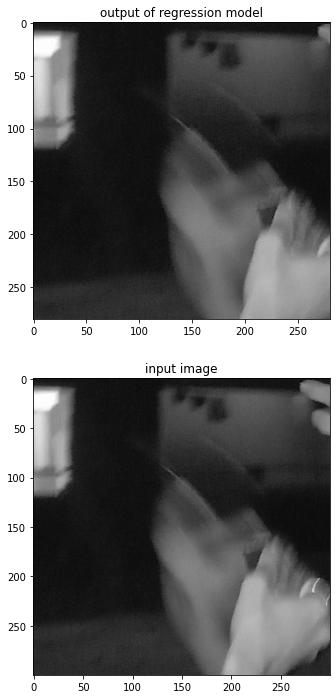

In [321]:
plt.figure(figsize=(12,12))
plt.subplot(211),
plt.imshow(pred4+bad4_part[0:rows-w,0:cols-w],cmap='gray')
plt.title('output of regression model')
plt.subplot(212),
plt.imshow(bad4_part,cmap='gray')
plt.title('input image')

In [322]:
bad5_part=bad5[100:500,900:1200]
(rows,cols)=bad5_part.shape
pred5=np.zeros((rows-w,cols-w))

for i in range(0,rows-w):
    for j in range(0,cols-w):
        pred5[i,j]=regressor.predict(bad5_part[i:i+w,j:j+w].reshape(1,361))

Text(0.5, 1.0, 'input image')

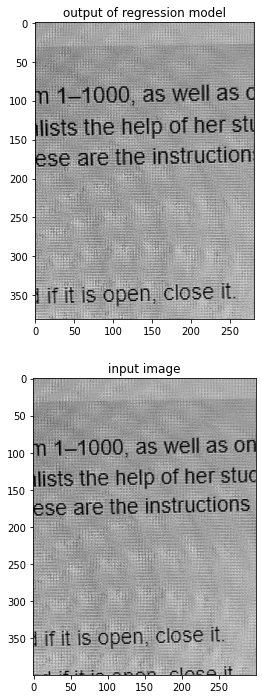

In [323]:
plt.figure(figsize=(12,12))
plt.subplot(211),
plt.imshow(pred5+bad5_part[0:rows-w,0:cols-w],cmap='gray')
plt.title('output of regression model')
plt.subplot(212),
plt.imshow(bad5_part,cmap='gray')
plt.title('input image')

In [2]:
img = cv.imread("TCGA-18-5592-01Z-00-DX1.png",0)
img.shape

(1000, 1000)